# Ashmeet Kaur
# Task 2: - From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually
# @The Sparks Foundation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the dataset

In [2]:
data=pd.read_csv("E:/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.shape

(150, 6)

In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
data=data.drop(['Id'],axis=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#Check null values
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

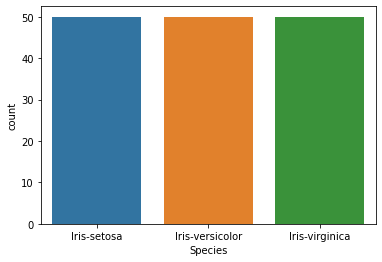

In [9]:
sns.countplot(x = 'Species', data =data)
plt.show()

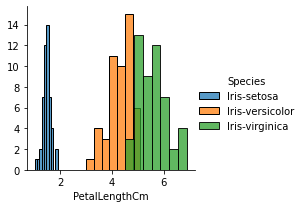

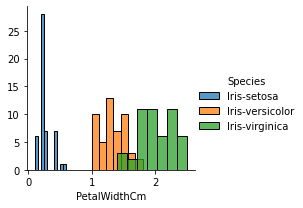

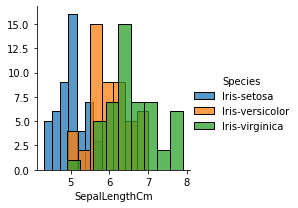

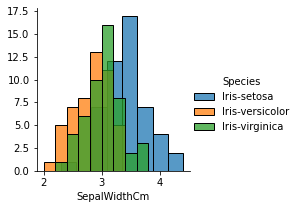

In [10]:
sns.FacetGrid(data,hue="Species",height=3).map(sns.histplot,"PetalLengthCm").add_legend()
sns.FacetGrid(data,hue="Species",height=3).map(sns.histplot,"PetalWidthCm").add_legend()
sns.FacetGrid(data,hue="Species",height=3).map(sns.histplot,"SepalLengthCm").add_legend()
sns.FacetGrid(data,hue="Species",height=3).map(sns.histplot,"SepalWidthCm").add_legend()
plt.show()

In [11]:
from sklearn import preprocessing
labels=preprocessing.LabelEncoder()
#encode classes in Species column from Iris-virginica,Iris-setosa,Iris-versicolor to 0,1,2 respectively
data['species']=labels.fit_transform(data['Species'])

In [12]:
data['species'].unique()

array([0, 1, 2])

In [13]:
data=data.drop('Species',axis=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
train=data.iloc[:,0:4]
train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
test=data.iloc[:,4]
test.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int32

# Silhouette Coefficient Prediction 

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
for i in range(3, 11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    prediction=kmeans.fit_predict(train)
    silhouette_avg=silhouette_score(train,prediction)
    print('For clusters=',i,':The average silhouette_score is :',silhouette_avg)

For clusters= 3 :The average silhouette_score is : 0.5525919445499757
For clusters= 4 :The average silhouette_score is : 0.4978256901095472
For clusters= 5 :The average silhouette_score is : 0.49285559183161204
For clusters= 6 :The average silhouette_score is : 0.36820569682713084
For clusters= 7 :The average silhouette_score is : 0.3600597997328459
For clusters= 8 :The average silhouette_score is : 0.3538815380353622
For clusters= 9 :The average silhouette_score is : 0.3407785831583716
For clusters= 10 :The average silhouette_score is : 0.33380799465469013


# Elbow Method:- the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

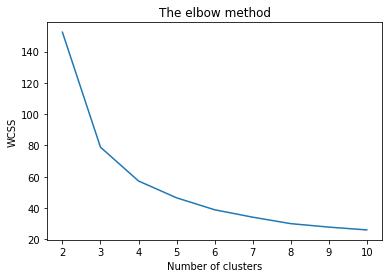

In [17]:
wcss = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(train)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(2, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [18]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(train)

# Visualization of output in 3D plane

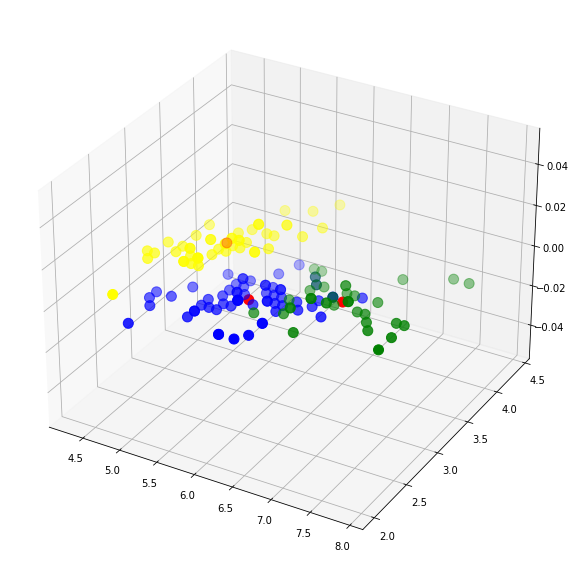

In [19]:
# 3d scatterplot using matplotlib
x =data.iloc[:, [0, 1, 2, 3]].values
fig = plt.figure(figsize = (10,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0],x[y_kmeans == 0, 1],s= 100,c='blue',label='Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0],x[y_kmeans == 1, 1],s= 100,c='yellow',label='Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0],x[y_kmeans == 2, 1],s= 100,c='green',label='Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='red',label='Centroids')
plt.show()

# Visualization of output in 2D plane

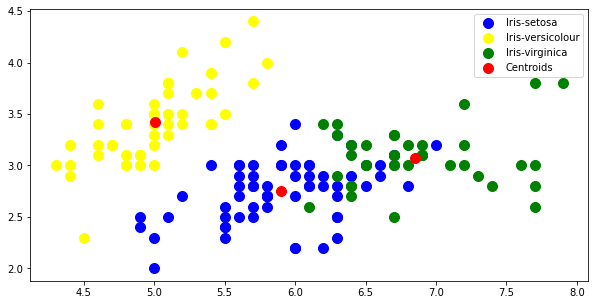

In [20]:
#Visualising the clusters
fig = plt.figure(figsize = (10,5))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],s=100,c='blue',label='Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],s=100,c='yellow',label='Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s=100,c='green',label='Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='red',label='Centroids')

plt.legend()